In [ ]:
# importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
######################################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/MyDrive/capstone/newVersion")
os.getcwd()

'/content/drive/MyDrive/capstone/newVersion'

In [ ]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mpl_toolkits.basemap import Basemap

## Task 1: Machine learning model building

Analysing train mobile data

In [ ]:
# loading Train mobile Data
mobileData_pd = pd.read_csv("train_mobile_brand.csv", header= "infer")

In [ ]:
mobileData_pd.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


In [ ]:
mobileData_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74840 entries, 0 to 74839
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74840 non-null  int64 
 1   gender        74840 non-null  object
 2   age           74840 non-null  int64 
 3   group_train   74840 non-null  object
 4   phone_brand   74840 non-null  object
 5   device_model  74840 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [ ]:
# lets analyze phone brand
mobileData_pd.phone_brand.value_counts()

Xiaomi     17337
samsung    13706
Huawei     13001
OPPO        5802
vivo        5658
           ...  
fs             1
pner           1
MIL            1
Ctyon          1
mole           1
Name: phone_brand, Length: 97, dtype: int64

In [ ]:
mobileData_pd.phone_brand.value_counts().describe()

count       97.000000
mean       771.546392
std       2721.369263
min          1.000000
25%          7.000000
50%         21.000000
75%        140.000000
max      17337.000000
Name: phone_brand, dtype: float64

so it means there are 97 unique brand of phones in this data, out of which around 50%(48 brands) have count of only 21. So may be we can group them as one brand going forward

In [ ]:
# checking for null records
mobileData_pd.isnull().sum()

device_id       0
gender          0
age             0
group_train     0
phone_brand     0
device_model    0
dtype: int64

In [ ]:
# Lets analyze age Data
mobileData_pd["age"].value_counts()

26    4555
27    4487
29    4361
28    4097
25    3751
      ... 
84       2
1        1
94       1
96       1
90       1
Name: age, Length: 85, dtype: int64

Age and gender distribution 

In [ ]:
mobileData_pd["age"].describe()

count    74840.000000
mean        31.407924
std          9.867279
min          1.000000
25%         25.000000
50%         29.000000
75%         36.000000
max         96.000000
Name: age, dtype: float64

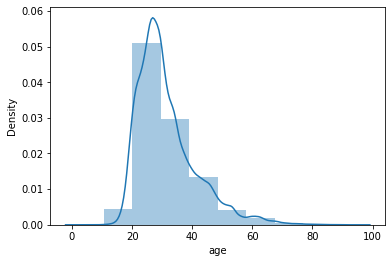

In [ ]:
sns.distplot(mobileData_pd["age"],bins=10)
plt.show()

The distribution is skewed towards left for age attribute where majority of the people are between 20 years to 30 years

In [ ]:
# lets analys gender
mobileData_pd.gender.value_counts(normalize= True)*100

M    64.183592
F    35.816408
Name: gender, dtype: float64

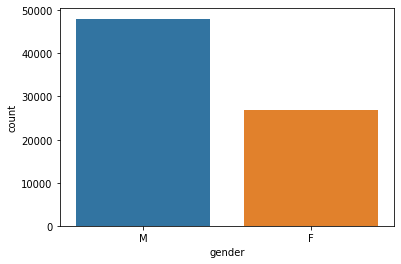

In [ ]:
sns.countplot(x="gender",data= mobileData_pd )
plt.show()

Its evident that data has more records for Males and unbalanced. We might have to use some technique to work with this data during model cretaion

In [ ]:
# lets analyze age group varibale

mobileData_pd["group_train"].value_counts(normalize=True)*100

M25-32    26.591395
M32+      21.801176
M0-24     15.791021
F25-32    14.351951
F32+      13.067878
F0-24      8.396579
Name: group_train, dtype: float64

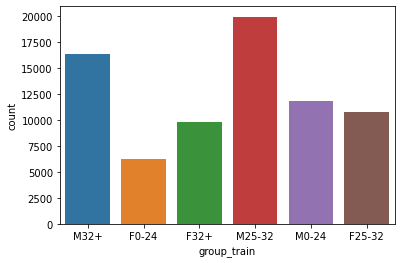

In [ ]:
sns.countplot(x="group_train", data = mobileData_pd)
plt.show()

The same trend of data records is evident here which shows that Female records are lesser by approx. 50% less. The distribution shows same difference across different categories. So we can use either age or age gender as a label column



---



---



Boxplot analysis for gender and age (bivariate)

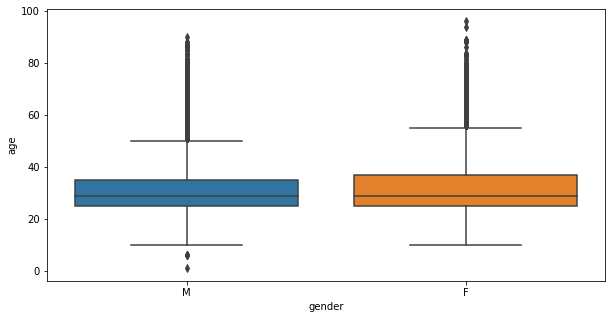

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "gender", y="age", data = mobileData_pd)
plt.show()

The overall mean for male and Female poluation in the data set are comparable in terms of age , however the spread of female population is a bit more than Male population, which indictes that Females with older age tend to use mobile devices than Male counterparts in the same age group.

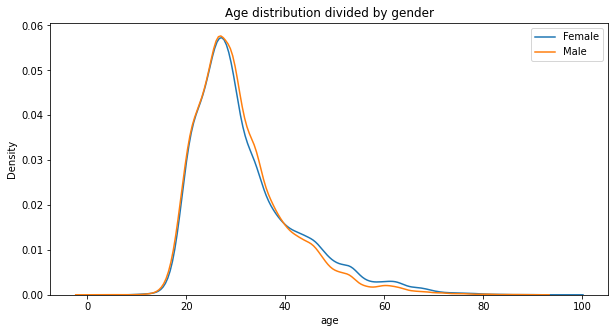

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot( mobileData_pd['age'][ mobileData_pd['gender'] == 'F' ], label='Female')
sns.kdeplot( mobileData_pd['age'][ mobileData_pd['gender'] == 'M' ], label='Male').set_title(
                                        'Age distribution divided by gender')
plt.legend()
plt.show()

The distribution above confirms the previous analysis where people with higher age group are Females as compared to Males. Also the trend reverses for age group between 20 to 40,where there are more Males as compared to females

## subtasks in EDA and advanced visualization

Plot percentage of device_ids with and without event data 

In [ ]:
# reading train event Data
eventData_pd = pd.read_csv("train_event_data.csv", header= "infer")

In [ ]:
eventData_pd.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
0,-7548291590301750000,M,33,M32+,2369465.0,2016-05-03 15:55:35,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869.0,2016-05-03 06:07:16,33.98,116.79
2,-7548291590301750000,M,33,M32+,1079338.0,2016-05-04 03:28:02,33.98,116.79
3,-7548291590301750000,M,33,M32+,1078881.0,2016-05-04 02:53:08,33.98,116.79
4,-7548291590301750000,M,33,M32+,1068711.0,2016-05-03 15:59:35,33.98,116.79


In [ ]:
eventData_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   device_id      1266933 non-null  int64  
 1   gender         1266933 non-null  object 
 2   age            1266933 non-null  int64  
 3   group_train    1266933 non-null  object 
 4   event_id       1215598 non-null  float64
 5   datetimestamp  1215598 non-null  object 
 6   latitude       1215598 non-null  float64
 7   longitude      1215598 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 77.3+ MB


In [ ]:
eventData_pd.isnull().sum()

device_id            0
gender               0
age                  0
group_train          0
event_id         51335
datetimestamp    51335
latitude         51335
longitude        51335
dtype: int64

So there are 51335 records in the trasin event Data that do not have event information

In [ ]:
eventData_pd["event_id"].notnull().value_counts(normalize = True)*100

True     95.948089
False     4.051911
Name: event_id, dtype: float64

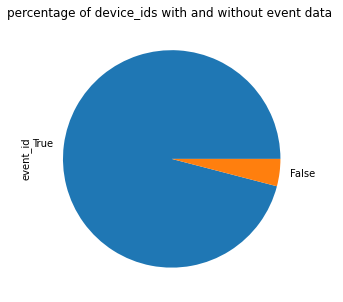

In [ ]:
eventData_pd["event_id"].notnull().value_counts(normalize = True).plot.pie(figsize=(5,5))
plt.title("percentage of device_ids with and without event data ")
plt.show()


From the analysis above its know that devices with event details in the Event Data has event details for aprrox. 96% of the devices and has missing event details for 4 percent of devices

In [ ]:
# lets Divide this data into device with Event Data and Device without Event Data

## filtering records without eventID

In [ ]:

eventData_withoutEvent_pd = eventData_pd[eventData_pd["event_id"].isnull()]

In [ ]:
eventData_withoutEvent_pd.shape

(51335, 8)

In [ ]:
eventData_withoutEvent_pd.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
1215595,398514470209561000,M,68,M32+,NaN,NaN,NaN,NaN
1215596,-3073918292047050000,M,27,M25-32,NaN,NaN,NaN,NaN
1215597,5805880616488060000,M,39,M32+,NaN,NaN,NaN,NaN
1215598,-2403560729305410000,M,25,M25-32,NaN,NaN,NaN,NaN
1215599,-1889893391998300000,M,22,M0-24,NaN,NaN,NaN,NaN


In [ ]:
# lets drop the NaN values columns

In [ ]:
eventData_withoutEvent_pd = eventData_withoutEvent_pd.drop(["event_id","datetimestamp","latitude","longitude"], axis = 1)

In [ ]:
eventData_withoutEvent_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51335 entries, 1215595 to 1266932
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   device_id    51335 non-null  int64 
 1   gender       51335 non-null  object
 2   age          51335 non-null  int64 
 3   group_train  51335 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.0+ MB


In [ ]:
#lets Save this dataframe to csv file for later use
eventData_withoutEvent_pd.to_csv("trainEventDataWithouteventid.csv", index= False)

### Filtering records with event IDs

In [ ]:
eventData_with_Event_pd = eventData_pd[eventData_pd["event_id"].notnull()]

In [ ]:
eventData_with_Event_pd.shape

(1215598, 8)

In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
0,-7548291590301750000,M,33,M32+,2369465.0,2016-05-03 15:55:35,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869.0,2016-05-03 06:07:16,33.98,116.79
2,-7548291590301750000,M,33,M32+,1079338.0,2016-05-04 03:28:02,33.98,116.79
3,-7548291590301750000,M,33,M32+,1078881.0,2016-05-04 02:53:08,33.98,116.79
4,-7548291590301750000,M,33,M32+,1068711.0,2016-05-03 15:59:35,33.98,116.79


In [ ]:
eventData_with_Event_pd.isnull().sum()

device_id        0
gender           0
age              0
group_train      0
event_id         0
datetimestamp    0
latitude         0
longitude        0
dtype: int64

In [ ]:
# converting datetimestamp to timestamp format for further analysis

In [ ]:
eventData_with_Event_pd['timestamp'] = pd.to_datetime(eventData_with_Event_pd['datetimestamp'])

In [ ]:
eventData_with_Event_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1251632
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   device_id      1215598 non-null  int64         
 1   gender         1215598 non-null  object        
 2   age            1215598 non-null  int64         
 3   group_train    1215598 non-null  object        
 4   event_id       1215598 non-null  float64       
 5   datetimestamp  1215598 non-null  object        
 6   latitude       1215598 non-null  float64       
 7   longitude      1215598 non-null  float64       
 8   timestamp      1215598 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 92.7+ MB


In [ ]:
#lets drop off datetimestamp field now
eventData_with_Event_pd.drop("datetimestamp", axis = 1 , inplace = True)

In [ ]:
eventData_with_Event_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1251632
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   device_id    1215598 non-null  int64         
 1   gender       1215598 non-null  object        
 2   age          1215598 non-null  int64         
 3   group_train  1215598 non-null  object        
 4   event_id     1215598 non-null  float64       
 5   latitude     1215598 non-null  float64       
 6   longitude    1215598 non-null  float64       
 7   timestamp    1215598 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 83.5+ MB


In [ ]:
# Lets Extract day of week and time of day from timestamp field for further analysis

In [ ]:
eventData_with_Event_pd['day_of_week']= eventData_with_Event_pd['timestamp'].dt.dayofweek

In [ ]:
eventData_with_Event_pd["hour_of_day"] = eventData_with_Event_pd['timestamp'].dt.hour

In [ ]:
eventData_with_Event_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1251632
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   device_id    1215598 non-null  int64         
 1   gender       1215598 non-null  object        
 2   age          1215598 non-null  int64         
 3   group_train  1215598 non-null  object        
 4   event_id     1215598 non-null  float64       
 5   latitude     1215598 non-null  float64       
 6   longitude    1215598 non-null  float64       
 7   timestamp    1215598 non-null  datetime64[ns]
 8   day_of_week  1215598 non-null  int64         
 9   hour_of_day  1215598 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 102.0+ MB


In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,latitude,longitude,timestamp,day_of_week,hour_of_day
0,-7548291590301750000,M,33,M32+,2369465.0,33.98,116.79,2016-05-03 15:55:35,1,15
1,-7548291590301750000,M,33,M32+,1080869.0,33.98,116.79,2016-05-03 06:07:16,1,6
2,-7548291590301750000,M,33,M32+,1079338.0,33.98,116.79,2016-05-04 03:28:02,2,3
3,-7548291590301750000,M,33,M32+,1078881.0,33.98,116.79,2016-05-04 02:53:08,2,2
4,-7548291590301750000,M,33,M32+,1068711.0,33.98,116.79,2016-05-03 15:59:35,1,15


Graph representing the distribution of events on different days of a week 

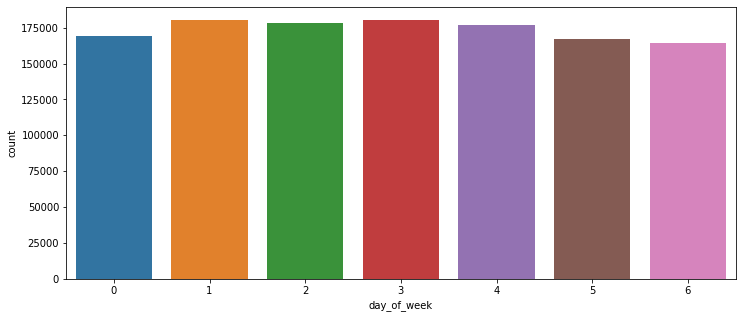

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="day_of_week", data= eventData_with_Event_pd )

plt.show()

Distribution of Male and Female users on day of Week

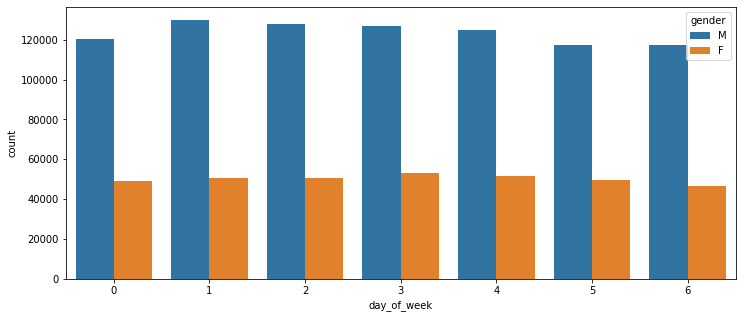

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="day_of_week", data= eventData_with_Event_pd ,hue="gender")

plt.show()

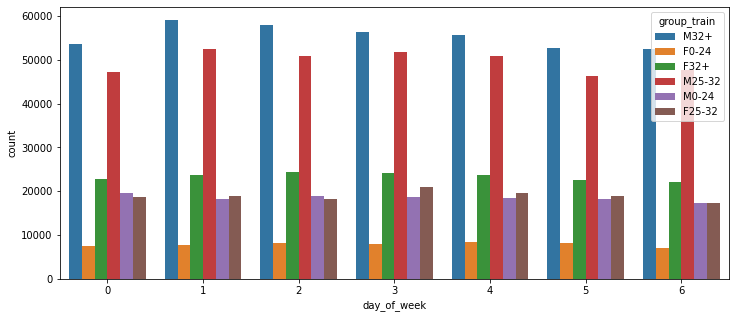

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="day_of_week", data= eventData_with_Event_pd ,hue="group_train")

plt.show()

The day of the week with Monday=0, Sunday=6
The count of events for each day in the week do not differ by much and remains almost same . This shows that devices are being used for regularly and it does not matter what day of week it is. We may drop this field during Feature selection as it does not add much information in determining Gender or Age.

Q. Is there any difference in the distribution of events for different age groups over different days of week? (Consider the age groups as 0–24, 25–32, 33–45, 46+]

Ans: No , as per the distribution above there is not much observed difference



---



---



Graph representing the distribution of events per hour (for one-week data)

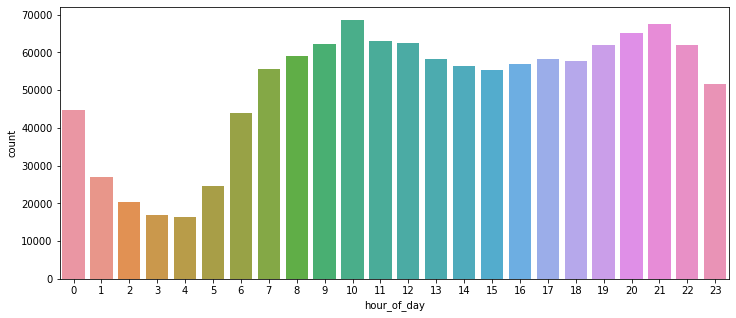

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="hour_of_day", data= eventData_with_Event_pd )

plt.show()

There is a dip in activity after midnight till around 5 am in morning

The activity keeps increasing in morning hours from 6 am and peaks between 9 am to 12:00 pm in after noon

Activity dips again but not much 1 pm to 5 pm evening 

The activity again starts rising from 6 pm and peaks around 9 pm in the night

Hence we might need to some kind of grouping for this feature while creating model

In [ ]:
eventData_with_Event_pd["hour_of_day"].value_counts()

10    68578
21    67498
20    65099
11    62920
12    62584
9     62226
22    61978
19    61947
8     59032
13    58304
17    58200
18    57610
16    57002
14    56324
7     55583
15    55224
23    51508
0     44864
6     43970
1     27090
5     24536
2     20248
3     16991
4     16282
Name: hour_of_day, dtype: int64

Binning Hour of Day : Part of Feature Enginering

In [ ]:
# do the hour binning into 4 groups morning, afternoon , evening  and night

In [ ]:
def hourBins(x):
    if x<6:
        return "night"
    elif x>= 6 and x<12:
        return "Morning"
    elif x>= 12 and x<18:
        return "Afternoon"
    elif x>= 18 and x<24:
        return "Evening"

In [ ]:
eventData_with_Event_pd["hour_bin"] = eventData_with_Event_pd["hour_of_day"].apply(lambda x : hourBins(x))

In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,latitude,longitude,timestamp,day_of_week,hour_of_day,hour_bin
0,-7548291590301750000,M,33,M32+,2369465.0,33.98,116.79,2016-05-03 15:55:35,1,15,Afternoon
1,-7548291590301750000,M,33,M32+,1080869.0,33.98,116.79,2016-05-03 06:07:16,1,6,Morning
2,-7548291590301750000,M,33,M32+,1079338.0,33.98,116.79,2016-05-04 03:28:02,2,3,night
3,-7548291590301750000,M,33,M32+,1078881.0,33.98,116.79,2016-05-04 02:53:08,2,2,night
4,-7548291590301750000,M,33,M32+,1068711.0,33.98,116.79,2016-05-03 15:59:35,1,15,Afternoon


Events distribution as per hour bins

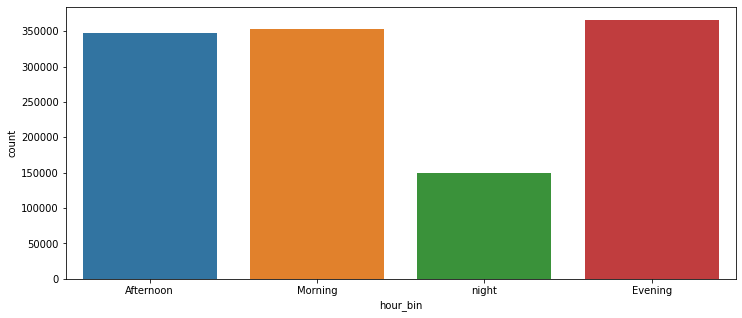

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="hour_bin", data= eventData_with_Event_pd )

plt.show()

now it seems like a better feature as it adds information on device usage more clearly as per the time of day.

The difference in the distribution of events per hour for males and females 

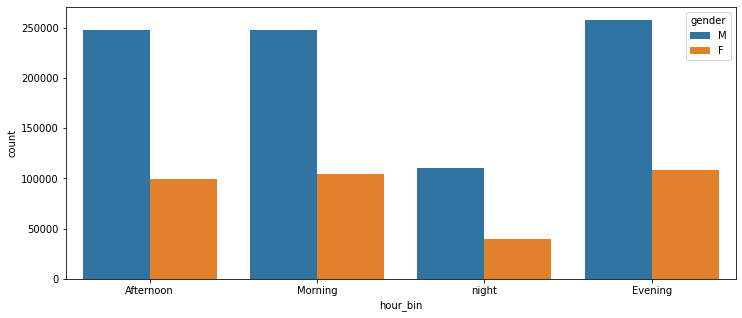

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="hour_bin", data= eventData_with_Event_pd, hue = "gender" )

plt.show()

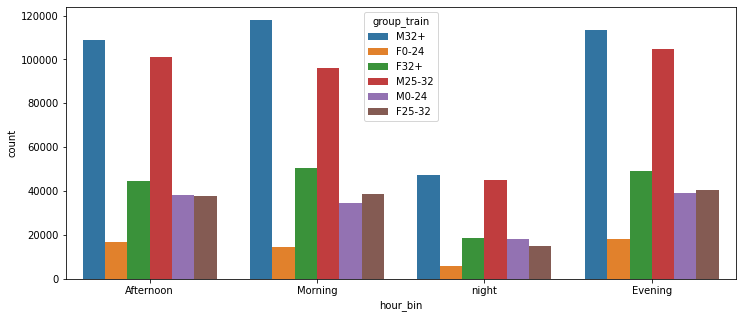

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="hour_bin", data= eventData_with_Event_pd, hue = "group_train" )

plt.show()

Analysis: hour_bin has variation for both gender and age and can be a good feature for modelling

In [ ]:
# saving the Train Event Data for future analysis
eventData_with_Event_pd.to_csv("EventDataWithEventDetails.csv", index= False)

In [ ]:
#later comment it
#eventData_with_Event_pd = pd.read_csv("EventDataWithEventDetails.csv", header = "infer")



---



---



#EDA and visualization - "Phone Brand and Application Preferences".

Stacked bar chart for the top 10 mobile brands across male and female consumers

In [ ]:
# for this lets use mobileData_pd dataframe

In [ ]:
mobileData_pd.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


In [ ]:
mobileData_pd["phone_brand"].value_counts().head(10)

Xiaomi     17337
samsung    13706
Huawei     13001
OPPO        5802
vivo        5658
Meizu       4710
Coolpad     3349
lenovo      2695
Gionee      1124
HTC         1015
Name: phone_brand, dtype: int64

In [ ]:
# lets get this in a Dataframe
top_ten_mobileBrands = mobileData_pd["phone_brand"].value_counts().head(10)

In [ ]:
top_ten_mobileBrands

Xiaomi     17337
samsung    13706
Huawei     13001
OPPO        5802
vivo        5658
Meizu       4710
Coolpad     3349
lenovo      2695
Gionee      1124
HTC         1015
Name: phone_brand, dtype: int64

In [ ]:
top_brands_female =[]
top_brands_male = []

for brands in top_ten_mobileBrands.index:
  top_brands = mobileData_pd[mobileData_pd.phone_brand == brands]
  top_brands_female.append(len(top_brands[top_brands.gender == "F"]))
  top_brands_male.append(len(top_brands[top_brands.gender == "M"]))

In [ ]:
Female_proportion = list(top_brands_female/top_ten_mobileBrands)
Female_proportion

[0.342043029359174,
 0.3971253465635488,
 0.32743635104991925,
 0.44484660461909686,
 0.4701307882644044,
 0.2772823779193206,
 0.32218572708271126,
 0.33172541743970313,
 0.3585409252669039,
 0.316256157635468]

In [ ]:
Male_Proportion = list(top_brands_male/top_ten_mobileBrands)
Male_Proportion

[0.657956970640826,
 0.6028746534364512,
 0.6725636489500808,
 0.5551533953809031,
 0.5298692117355956,
 0.7227176220806794,
 0.6778142729172888,
 0.6682745825602968,
 0.641459074733096,
 0.683743842364532]

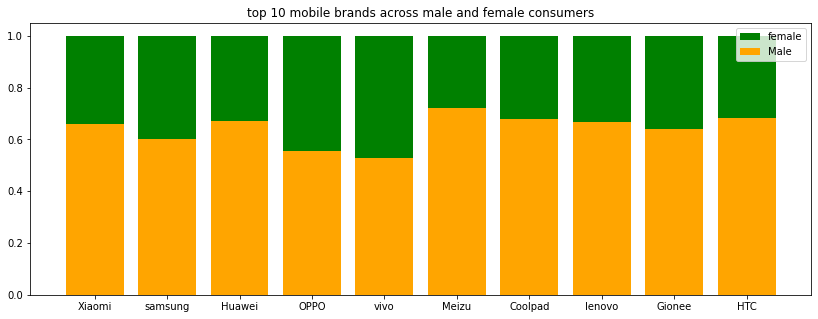

In [ ]:
plt.figure(figsize=(14,5))
splot1 = plt.bar(top_ten_mobileBrands.index, Female_proportion ,color = "green", label = "female", bottom = Male_Proportion)
splot2 = plt.bar(top_ten_mobileBrands.index, Male_Proportion ,color = "orange", label = "Male")
plt.title("top 10 mobile brands across male and female consumers")
plt.legend()
plt.show()

Analysis: for Females consumers "OPPO","Vivo" and "Samsung" are popular brands, whereas for Male Consumers "Meizu","Coolpad" and "Huawei" are popular

Top 10 mobile phone brands by age groups (Consider the age groups as 0–24, 25–32, 33–45, 46+.)

In [ ]:
mobileData_pd_for_Age = mobileData_pd[ mobileData_pd["phone_brand"].isin(list(top_ten_mobileBrands.index))]

In [ ]:
mobileData_pd_for_Age.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


In [ ]:
mobileData_pd_for_Age.phone_brand.value_counts()

Xiaomi     17337
samsung    13706
Huawei     13001
OPPO        5802
vivo        5658
Meizu       4710
Coolpad     3349
lenovo      2695
Gionee      1124
HTC         1015
Name: phone_brand, dtype: int64

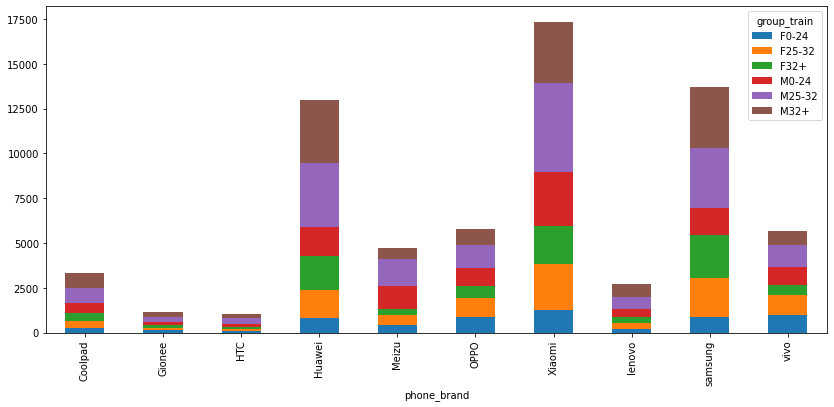

In [ ]:
mobileData_pd_for_Age.groupby(["phone_brand","group_train"]).size().unstack().plot(kind="bar", stacked= "True",figsize=(14,6))
plt.show()

Phone brand has different distribution for age groups for different brands. This could be an importand feature for model training



---



---



Chart representing 10 frequent applications and the corresponding percentage of male and female consumers

In [ ]:
# lets read App Events and App Events Meta Data

In [ ]:
appEvents_pd = pd.read_csv("app_events.csv", header= "infer")

In [ ]:
appEvents_pd.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [ ]:
appEvents_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
 #   Column        Dtype
---  ------        -----
 0   event_id      int64
 1   app_id        int64
 2   is_installed  int64
 3   is_active     int64
dtypes: int64(4)
memory usage: 991.0 MB


In [ ]:
appEvents_pd.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
dtype: int64

In [ ]:
appEvents_pd.is_installed.value_counts()

1    32473067
Name: is_installed, dtype: int64

In [ ]:
appEvents_pd.drop("is_installed", axis=1, inplace=True)

Column "is_installed" has only one 1 value , so it indicates that all apps are installed. This column can be dropped as well , as it does not any information

In [ ]:
appEvents_pd.app_id.value_counts()

 8693964245073640147    1151391
 5927333115845830913     898788
 4348659952760821294     795995
 628020936226491308      620659
 3433289601737013244     373186
                         ...   
 4882386797051379554          1
-1633878405195830874          1
-7141077104732543752          1
-4556181215115179260          1
 7499801479003898729          1
Name: app_id, Length: 19237, dtype: int64

In [ ]:
# removing duplicate rows
appEvents_pd.drop_duplicates( keep='first', inplace = True)

In [ ]:
appEvents_pd.shape

(32473067, 3)

In [ ]:
#lets get Top 10 app IDs

In [ ]:
top_ten_app_id = appEvents_pd.app_id.value_counts().head(10)

In [ ]:
top_ten_app_id

 8693964245073640147    1151391
 5927333115845830913     898788
 4348659952760821294     795995
 628020936226491308      620659
 3433289601737013244     373186
-2320783822570582843     295619
 5729517255058371973     272353
 3683147815759994238     265823
 6284164581582112235     260639
 8948670408023620661     254316
Name: app_id, dtype: int64

In [ ]:
#lets perform a join from Train Events table for these app Ids

In [ ]:
appEvents_pd_for_analysis = appEvents_pd[appEvents_pd["app_id"].isin(top_ten_app_id.index)]

In [ ]:
appEvents_pd_for_analysis.app_id.value_counts()

 8693964245073640147    1151391
 5927333115845830913     898788
 4348659952760821294     795995
 628020936226491308      620659
 3433289601737013244     373186
-2320783822570582843     295619
 5729517255058371973     272353
 3683147815759994238     265823
 6284164581582112235     260639
 8948670408023620661     254316
Name: app_id, dtype: int64

In [ ]:
appEvents_pd_for_analysis.head()

,event_id,app_id,is_active
0,2,5927333115845830913,1
4,2,8693964245073640147,1
12,2,628020936226491308,0
15,2,4348659952760821294,0
20,6,6284164581582112235,1


In [ ]:
# lets perform join on event ID

In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,latitude,longitude,timestamp,day_of_week,hour_of_day,hour_bin
0,-7548291590301750000,M,33,M32+,2369465.0,33.98,116.79,2016-05-03 15:55:35,1,15,Afternoon
1,-7548291590301750000,M,33,M32+,1080869.0,33.98,116.79,2016-05-03 06:07:16,1,6,Morning
2,-7548291590301750000,M,33,M32+,1079338.0,33.98,116.79,2016-05-04 03:28:02,2,3,night
3,-7548291590301750000,M,33,M32+,1078881.0,33.98,116.79,2016-05-04 02:53:08,2,2,night
4,-7548291590301750000,M,33,M32+,1068711.0,33.98,116.79,2016-05-03 15:59:35,1,15,Afternoon


In [ ]:
appgenderBaseAnalysis_df = eventData_with_Event_pd.merge(appEvents_pd_for_analysis, on="event_id", how="left")

In [ ]:
appgenderBaseAnalysis_df.head()

,device_id,gender,age,group_train,event_id,latitude,longitude,timestamp,day_of_week,hour_of_day,hour_bin,app_id,is_active
0,-7548291590301750000,M,33,M32+,2369465.0,33.98,116.79,2016-05-03 15:55:35,1,15,Afternoon,NaN,NaN
1,-7548291590301750000,M,33,M32+,1080869.0,33.98,116.79,2016-05-03 06:07:16,1,6,Morning,NaN,NaN
2,-7548291590301750000,M,33,M32+,1079338.0,33.98,116.79,2016-05-04 03:28:02,2,3,night,NaN,NaN
3,-7548291590301750000,M,33,M32+,1078881.0,33.98,116.79,2016-05-04 02:53:08,2,2,night,NaN,NaN
4,-7548291590301750000,M,33,M32+,1068711.0,33.98,116.79,2016-05-03 15:59:35,1,15,Afternoon,NaN,NaN


In [ ]:
#dropping Records where app_id is not found
appgenderBaseAnalysis_df = appgenderBaseAnalysis_df[appgenderBaseAnalysis_df.app_id.notnull()]

In [ ]:
appgenderBaseAnalysis_df.isnull().sum()

device_id      0
gender         0
age            0
group_train    0
event_id       0
latitude       0
longitude      0
timestamp      0
day_of_week    0
hour_of_day    0
hour_bin       0
app_id         0
is_active      0
dtype: int64

In [ ]:
# lets plot 10 frequent applications and the corresponding percentage of male and female consumers

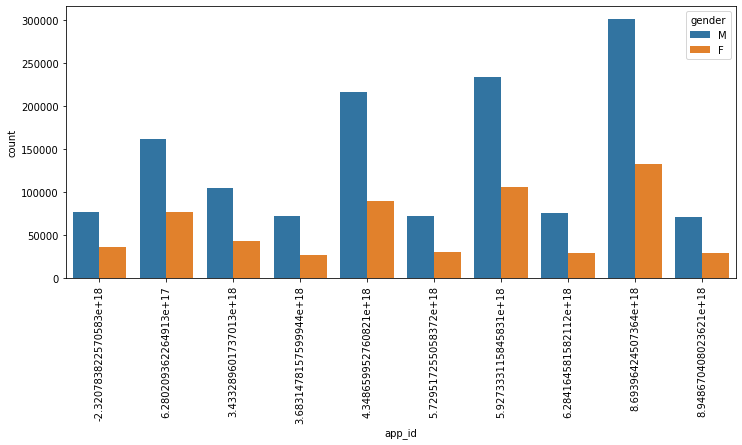

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="app_id", data= appgenderBaseAnalysis_df, hue = "gender" )
plt.xticks(rotation=90)
plt.show()

So we see in the above distribution that usage of apps differs across male and Female population. This could be good feature for model. We can group these apps as per the category to draw better results

## Advanced Visualization and Clustering

In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,latitude,longitude,timestamp,day_of_week,hour_of_day,hour_bin
0,-7548291590301750000,M,33,M32+,2369465.0,33.98,116.79,2016-05-03 15:55:35,1,15,Afternoon
1,-7548291590301750000,M,33,M32+,1080869.0,33.98,116.79,2016-05-03 06:07:16,1,6,Morning
2,-7548291590301750000,M,33,M32+,1079338.0,33.98,116.79,2016-05-04 03:28:02,2,3,night
3,-7548291590301750000,M,33,M32+,1078881.0,33.98,116.79,2016-05-04 02:53:08,2,2,night
4,-7548291590301750000,M,33,M32+,1068711.0,33.98,116.79,2016-05-03 15:59:35,1,15,Afternoon


In [ ]:
eventData_with_Event_pd.latitude.value_counts()

0.00     356301
1.00      28630
30.00     12176
38.03      4800
34.74      4640
          ...  
23.98         1
44.27         1
9.47          1
9.55          1
45.16         1
Name: latitude, Length: 2707, dtype: int64

In [ ]:
eventData_with_Event_pd.longitude.value_counts()

0.00      356161
1.00       28622
104.00     11487
111.92      3819
118.81      3676
           ...  
98.34          1
99.97          1
131.80         1
126.86         1
98.36          1
Name: longitude, Length: 2914, dtype: int64

Plot the visualization plot for a sample of 1 lakh data points.

In [ ]:
EventDataWithAppID_sample_df = eventData_with_Event_pd.sample(n=100000, random_state=43)

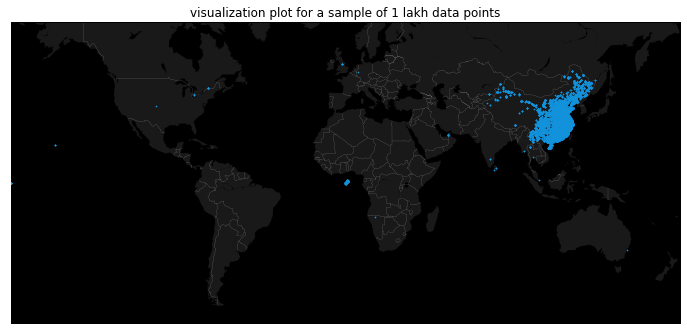

In [ ]:
plt.figure(1,figsize=(12,6))

ml = Basemap(projection = "merc",
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

ml.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
ml.drawmapboundary(fill_color='#000000')                # black background
ml.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

mxy = ml(EventDataWithAppID_sample_df.longitude.tolist(), EventDataWithAppID_sample_df.latitude.tolist())
ml.scatter(mxy[0],mxy[1],s=3, c="#1292db",lw = 0 , alpha = 1, zorder = 5)

plt.title("visualization plot for a sample of 1 lakh data points")
plt.show()



---



---



# Zooming into specific region

In [ ]:
lon_min , lon_max = 60 , 180
lat_min , lat_max = 0, 65

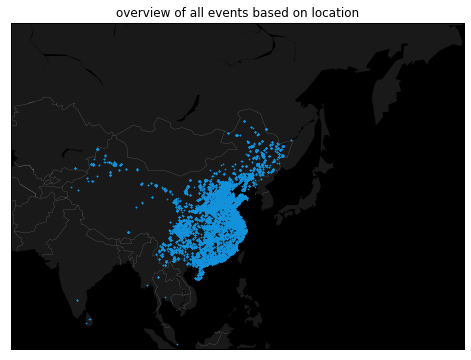

In [ ]:

plt.figure(2,figsize=(12,6))

ml2 = Basemap(projection = "merc",
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=0,
             resolution='c')

ml2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
ml2.drawmapboundary(fill_color='#000000')                # black background
ml2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

mxy2 = ml2(EventDataWithAppID_sample_df.longitude.tolist(), EventDataWithAppID_sample_df.latitude.tolist())
ml2.scatter(mxy2[0],mxy2[1],s=3, c="#1292db",lw = 0 , alpha = 1, zorder = 5)

plt.title("overview of all events based on location")
plt.show()

Compare the event visualization plots based on the users' gender information. (This can be done on the sample of 1 lakh data points.)

In [ ]:
# splitting data to male and Female events

In [ ]:
female_events = EventDataWithAppID_sample_df[EventDataWithAppID_sample_df['gender'] == 'F']
male_events = EventDataWithAppID_sample_df[EventDataWithAppID_sample_df['gender'] == 'M'] 

In [ ]:
female_events.shape

(26450, 11)

In [ ]:
male_events.shape

(73550, 11)

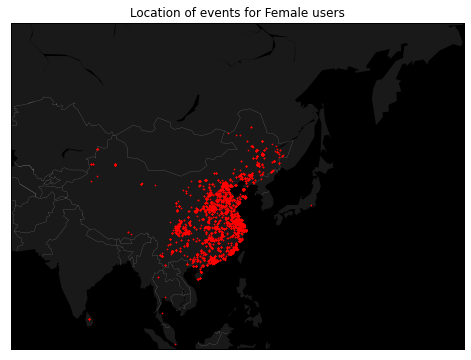

In [ ]:
plt.figure(3,figsize=(12,6))

ml3 = Basemap(projection = "merc",
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=0,
             resolution='c')

ml3.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
ml3.drawmapboundary(fill_color='#000000')                # black background
ml3.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

mxy3 = ml3(female_events.longitude.tolist(), female_events.latitude.tolist())
ml3.scatter(mxy3[0],mxy3[1],s=3, c="red",lw = 0 , alpha = 1, zorder = 5)


plt.title("Location of events for Female users")
plt.show()

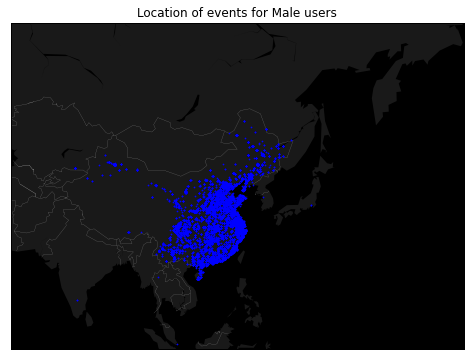

In [ ]:
plt.figure(4,figsize=(12,6))

ml4 = Basemap(projection = "merc",
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=0,
             resolution='c')

ml4.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
ml4.drawmapboundary(fill_color='#000000')                # black background
ml4.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

mxy4 = ml4(male_events.longitude.tolist(), male_events.latitude.tolist())
ml4.scatter(mxy4[0],mxy4[1],s=3, c="blue",lw = 0 , alpha = 1, zorder = 5)

plt.title("Location of events for Male users")
plt.show()

Male and Female population is concentrated in the same area , however the presence of Male population is more dense than Female Population in the same area



---



---



Compare the event visualization plots based on the following age groups:



In [ ]:
group_train_enc = LabelEncoder()
male_events['group_train'] = group_train_enc.fit_transform(male_events['group_train']) 

In [ ]:
classes= group_train_enc.classes_  
classes[0:3]

array(['M0-24', 'M25-32', 'M32+'], dtype=object)

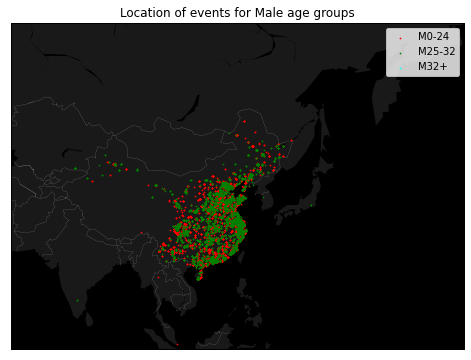

In [ ]:
plt.figure(5,figsize=(12,6))

classes= group_train_enc.classes_  
Male_classes = classes[0:3]

c=['Red','Green','Cyan'] 
ml5 = Basemap(projection = "merc",
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=0,
             resolution='c')

ml5.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
ml5.drawmapboundary(fill_color='#000000')                # black background
ml5.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

for i,group in enumerate(Male_classes):
  grp_male = male_events[male_events.group_train == (i+1)]
  mxy5 = ml5(grp_male.longitude.tolist(), grp_male.latitude.tolist())
  ml5.scatter(mxy5[0],mxy5[1],s=3, c=c[i],lw =0 , alpha = 1, zorder = 5, label= group)


plt.legend()
plt.title("Location of events for Male age groups")
plt.show()

For Female Gender Groups

In [ ]:
group_train_female_enc = LabelEncoder()
female_events['group_train'] = group_train_female_enc.fit_transform(female_events['group_train']) 

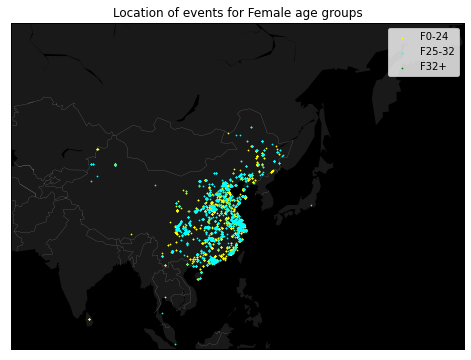

In [ ]:
plt.figure(6,figsize=(12,6))

classes= group_train_female_enc.classes_  
female_classes = classes

c=['yellow','cyan','green'] 
ml6 = Basemap(projection = "merc",
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=0,
             resolution='c')

ml6.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
ml6.drawmapboundary(fill_color='#000000')                # black background
ml6.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

for i,group in enumerate(female_classes):
  grp_female = female_events[female_events.group_train == (i+1)]
  mxy6 = ml6(grp_female.longitude.tolist(), grp_female.latitude.tolist())
  ml6.scatter(mxy6[0],mxy6[1],s=3, c=c[i],lw =0 , alpha = 1, zorder = 5, label= group)


plt.legend()
plt.title("Location of events for Female age groups")
plt.show()

Density of users across different age agoup also varies in density in same region. We need work on grouping them and extracting usable feature from it.

### Advanced Visualization and Clustering - II

DBSCAN Clustering

In [ ]:
# group device ID on latitude and  longitude median
latlong_feature_df = eventData_with_Event_pd.groupby("device_id")["latitude","longitude"].median().reset_index()

In [ ]:
latlong_feature_df.head()

,device_id,latitude,longitude
0,-9222956879900150000,23.19,113.24
1,-9221026417907250000,30.87,114.36
2,-9220830859283100000,0.00,0.00
3,-9220061629197650000,46.60,124.88
4,-9218960997324660000,0.00,0.00


In [ ]:
#removing Latitude and longitude with 0.00 values respectively
latlong_feature_df.drop(latlong_feature_df[(latlong_feature_df.latitude == 0.00) & (latlong_feature_df.longitude == 0.00)].index , inplace=True)

In [ ]:
# verification

In [ ]:
latlong_feature_df.latitude.value_counts()

1.00     304
30.00    131
23.13     34
22.56     30
23.03     30
        ... 
49.59      1
49.74      1
22.29      1
29.43      1
1.40       1
Name: latitude, Length: 2445, dtype: int64

In [ ]:
latlong_feature_df.longitude.value_counts()

1.000      304
104.000    132
114.040     27
114.030     25
114.330     25
          ... 
0.735        1
56.700       1
58.655       1
115.040      1
1.140        1
Name: longitude, Length: 2462, dtype: int64

In [ ]:
latlong_feature_df.head()

,device_id,latitude,longitude
0,-9222956879900150000,23.19,113.24
1,-9221026417907250000,30.87,114.36
3,-9220061629197650000,46.60,124.88
5,-9218769147970100000,28.60,112.33
10,-9215352913819630000,22.66,114.02


In [ ]:
latlong_feature_df.latitude.value_counts()

1.00     304
30.00    131
23.13     34
22.56     30
23.03     30
        ... 
49.59      1
49.74      1
22.29      1
29.43      1
1.40       1
Name: latitude, Length: 2445, dtype: int64

In [ ]:
#scaling and standarising lat long features

In [ ]:
scaler = StandardScaler()  
temp_scaled = scaler.fit_transform(latlong_feature_df[["latitude","longitude"]])

In [ ]:
temp_scaled = pd.DataFrame(temp_scaled)
temp_scaled.columns = ['lat', 'long']
temp_scaled.head()

,lat,long
0,-0.816511,0.161217
1,0.065457,0.207252
2,1.871882,0.639643
3,-0.195229,0.123815
4,-0.877376,0.193277


In [ ]:
coords = temp_scaled.to_numpy()

In [ ]:
kms_per_radian = 6371.0088
epsilon = 5/kms_per_radian
db = DBSCAN(eps= epsilon, min_samples= 50, algorithm = "ball_tree", metric = "haversine").fit(np.radians(coords))

In [ ]:
labels = db.labels_
len(set(labels))

24

In [ ]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22]),
 array([2129, 1235,  327,  916, 1118,   54,  374,  689, 1434,   98,  367,
         166,  217,   62,  129,  102,   57,  165,   62,   96,  113,   93,
          38,   33]))

In [ ]:
latlong_feature_df['cluster_label_dbscan'] = db.labels_

In [ ]:
latlong_feature_df.head()

,device_id,latitude,longitude,cluster_label_dbscan
0,-9222956879900150000,23.19,113.24,0
1,-9221026417907250000,30.87,114.36,1
3,-9220061629197650000,46.60,124.88,-1
5,-9218769147970100000,28.60,112.33,11
10,-9215352913819630000,22.66,114.02,0


In [ ]:
latlong_feature_df.cluster_label_dbscan.value_counts()

-1     2129
 7     1434
 0     1235
 3     1118
 2      916
 6      689
 5      374
 9      367
 1      327
 11     217
 10     166
 16     165
 13     129
 19     113
 14     102
 8       98
 18      96
 20      93
 12      62
 17      62
 15      57
 4       54
 21      38
 22      33
Name: cluster_label_dbscan, dtype: int64

Please note that the label -1 is designated for outliers and the rest of the labels are used for the clusters formed

In [ ]:
num_clusters = len(set(labels))
num_clusters

24

In [ ]:
clusters = pd.Series([coords[labels == n] for n in range(num_clusters)])

In [ ]:
clusters.head()

0    [[-0.8165106064734352, 0.16121741022974784], [...
1    [[0.06545668605781142, 0.20725151535151376], [...
2    [[0.5052919374112849, 0.18053529362906018], [0...
3    [[1.0990121069928658, 0.2869891617231436], [0....
4    [[0.8211005382525516, 0.49743078513693], [0.81...
dtype: object

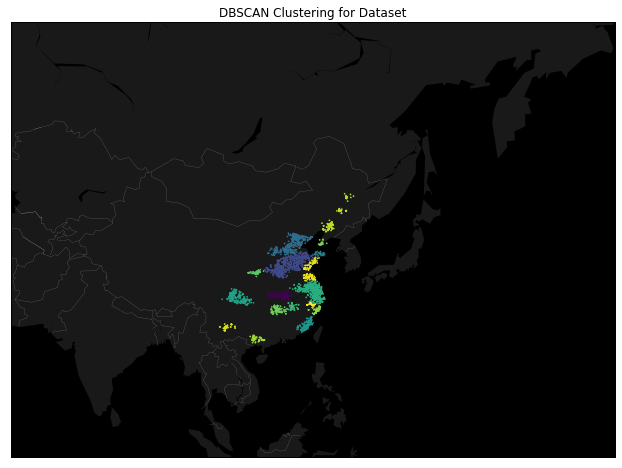

In [ ]:
## set the color scale

plt.figure(10,figsize=(15,8))
color_scale = np.log(latlong_feature_df.cluster_label_dbscan)
ml9 = Basemap(projection = "merc",
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=0,
             resolution='c')

ml9.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
ml9.drawmapboundary(fill_color='#000000')                # black background
ml9.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

mxy9 = ml9(latlong_feature_df.longitude.tolist(), latlong_feature_df.latitude.tolist())
ml9.scatter(mxy9[0],mxy9[1],s=3, c=color_scale,lw = 0 , alpha = 1, zorder = 5)

plt.title("DBSCAN Clustering for Dataset")
plt.show()

Clustering captures good trend in data for Gender and Age group analysis

In [ ]:
latlong_feature_df.head()

,device_id,latitude,longitude,cluster_label_dbscan
0,-9222956879900150000,23.19,113.24,0
1,-9221026417907250000,30.87,114.36,1
3,-9220061629197650000,46.60,124.88,-1
5,-9218769147970100000,28.60,112.33,11
10,-9215352913819630000,22.66,114.02,0


In [ ]:
#renaming feature name latitude and Longitude

In [ ]:
latlong_feature_df.rename(columns={'latitude':'latitude_med', 'longitude':'longitude_med'}, inplace=True)

In [ ]:
latlong_feature_df.head()

,device_id,latitude_med,longitude_med,cluster_label_dbscan
0,-9222956879900150000,23.19,113.24,0
1,-9221026417907250000,30.87,114.36,1
3,-9220061629197650000,46.60,124.88,-1
5,-9218769147970100000,28.60,112.33,11
10,-9215352913819630000,22.66,114.02,0


In [ ]:
latlong_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10074 entries, 0 to 23307
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   device_id             10074 non-null  int64  
 1   latitude_med          10074 non-null  float64
 2   longitude_med         10074 non-null  float64
 3   cluster_label_dbscan  10074 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 393.5 KB


In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,latitude,longitude,timestamp,day_of_week,hour_of_day,hour_bin
0,-7548291590301750000,M,33,M32+,2369465.0,33.98,116.79,2016-05-03 15:55:35,1,15,Afternoon
1,-7548291590301750000,M,33,M32+,1080869.0,33.98,116.79,2016-05-03 06:07:16,1,6,Morning
2,-7548291590301750000,M,33,M32+,1079338.0,33.98,116.79,2016-05-04 03:28:02,2,3,night
3,-7548291590301750000,M,33,M32+,1078881.0,33.98,116.79,2016-05-04 02:53:08,2,2,night
4,-7548291590301750000,M,33,M32+,1068711.0,33.98,116.79,2016-05-03 15:59:35,1,15,Afternoon


In [ ]:
eventData_with_Event_pd.latitude.value_counts()

0.00     356301
1.00      28630
30.00     12176
38.03      4800
34.74      4640
          ...  
23.98         1
44.27         1
9.47          1
9.55          1
45.16         1
Name: latitude, Length: 2707, dtype: int64

In [ ]:
eventData_with_Event_pd.longitude.value_counts()

0.00      356161
1.00       28622
104.00     11487
111.92      3819
118.81      3676
           ...  
98.34          1
99.97          1
131.80         1
126.86         1
98.36          1
Name: longitude, Length: 2914, dtype: int64

In [ ]:
eventData_with_Event_pd = eventData_with_Event_pd.merge(latlong_feature_df, on="device_id",
                                                           how="left")

In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,latitude,longitude,timestamp,day_of_week,hour_of_day,hour_bin,latitude_med,longitude_med,cluster_label_dbscan
0,-7548291590301750000,M,33,M32+,2369465.0,33.98,116.79,2016-05-03 15:55:35,1,15,Afternoon,33.98,116.79,-1.0
1,-7548291590301750000,M,33,M32+,1080869.0,33.98,116.79,2016-05-03 06:07:16,1,6,Morning,33.98,116.79,-1.0
2,-7548291590301750000,M,33,M32+,1079338.0,33.98,116.79,2016-05-04 03:28:02,2,3,night,33.98,116.79,-1.0
3,-7548291590301750000,M,33,M32+,1078881.0,33.98,116.79,2016-05-04 02:53:08,2,2,night,33.98,116.79,-1.0
4,-7548291590301750000,M,33,M32+,1068711.0,33.98,116.79,2016-05-03 15:59:35,1,15,Afternoon,33.98,116.79,-1.0


In [ ]:
eventData_with_Event_pd.isnull().sum()

device_id                    0
gender                       0
age                          0
group_train                  0
event_id                     0
latitude                     0
longitude                    0
timestamp                    0
day_of_week                  0
hour_of_day                  0
hour_bin                     0
latitude_med            314386
longitude_med           314386
cluster_label_dbscan    314386
dtype: int64

the null values are because we have removed the device IDs which had latitude and longitude =0.0, hence we will fill all the null values for lat and long medians with 0.0
Also giving these locations a different cluster ID which is 23

In [ ]:
eventData_with_Event_pd = eventData_with_Event_pd.fillna(value={'latitude_med':0.00,'longitude_med':0.00,'cluster_label_dbscan':23})

In [ ]:
# now dropping original Latitude and Longitude columns
eventData_with_Event_pd.drop(["latitude","longitude"], axis=1 , inplace = True)

In [ ]:
eventData_with_Event_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1215597
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   device_id             1215598 non-null  int64         
 1   gender                1215598 non-null  object        
 2   age                   1215598 non-null  int64         
 3   group_train           1215598 non-null  object        
 4   event_id              1215598 non-null  float64       
 5   timestamp             1215598 non-null  datetime64[ns]
 6   day_of_week           1215598 non-null  int64         
 7   hour_of_day           1215598 non-null  int64         
 8   hour_bin              1215598 non-null  object        
 9   latitude_med          1215598 non-null  float64       
 10  longitude_med         1215598 non-null  float64       
 11  cluster_label_dbscan  1215598 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4)

In [ ]:
eventData_with_Event_pd.isnull().sum()

device_id               0
gender                  0
age                     0
group_train             0
event_id                0
timestamp               0
day_of_week             0
hour_of_day             0
hour_bin                0
latitude_med            0
longitude_med           0
cluster_label_dbscan    0
dtype: int64

In [ ]:
eventData_with_Event_pd.cluster_label_dbscan.value_counts()

 23.0    314386
-1.0     167630
 7.0     145205
 3.0     105797
 0.0     102169
 2.0      80044
 6.0      67513
 1.0      32283
 9.0      30935
 5.0      28673
 16.0     21942
 11.0     19332
 10.0     18685
 13.0     12046
 19.0     11128
 8.0       8373
 18.0      8295
 20.0      8047
 14.0      7220
 12.0      4884
 22.0      4665
 4.0       4547
 15.0      4501
 17.0      3873
 21.0      3425
Name: cluster_label_dbscan, dtype: int64

In [ ]:
# we can also drop columns where cluster id is -1 as it is attributed to outliers.
#EventDataAppIDwithCluster_df = EventDataAppIDwithCluster_df[EventDataAppIDwithCluster_df.cluster_label_dbscan != -1.0]

In [ ]:
eventData_with_Event_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1215597
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   device_id             1215598 non-null  int64         
 1   gender                1215598 non-null  object        
 2   age                   1215598 non-null  int64         
 3   group_train           1215598 non-null  object        
 4   event_id              1215598 non-null  float64       
 5   timestamp             1215598 non-null  datetime64[ns]
 6   day_of_week           1215598 non-null  int64         
 7   hour_of_day           1215598 non-null  int64         
 8   hour_bin              1215598 non-null  object        
 9   latitude_med          1215598 non-null  float64       
 10  longitude_med         1215598 non-null  float64       
 11  cluster_label_dbscan  1215598 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4)

Checkpointing

In [ ]:
eventData_with_Event_pd.to_csv("EventDataWithEventAndClusterDetails.csv", index = False)

In [ ]:
#eventData_with_Event_pd = pd.read_csv("EventDataWithEventAndClusterDetails.csv", header = "infer")

In [ ]:
eventData_with_Event_pd = pd.read_csv("EventDataWithEventAndClusterDetails.csv", header = "infer")

End of checkpointing

In [ ]:
#test.info()

In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,timestamp,day_of_week,hour_of_day,hour_bin,latitude_med,longitude_med,cluster_label_dbscan
0,-7548291590301750000,M,33,M32+,2369465.0,2016-05-03 15:55:35,1,15,Afternoon,33.98,116.79,-1.0
1,-7548291590301750000,M,33,M32+,1080869.0,2016-05-03 06:07:16,1,6,Morning,33.98,116.79,-1.0
2,-7548291590301750000,M,33,M32+,1079338.0,2016-05-04 03:28:02,2,3,night,33.98,116.79,-1.0
3,-7548291590301750000,M,33,M32+,1078881.0,2016-05-04 02:53:08,2,2,night,33.98,116.79,-1.0
4,-7548291590301750000,M,33,M32+,1068711.0,2016-05-03 15:59:35,1,15,Afternoon,33.98,116.79,-1.0


## Feature Engineering

Cleaning and Grouping App Meta Data

In [ ]:
# now lets add labels to the data set
# lets Read App Meta Data 
appEvents_metadata_pd = pd.read_csv("app_events_meta_data.csv", header= "infer", skiprows=[420939])


In [ ]:
appEvents_metadata_pd = appEvents_metadata_pd.iloc[1:]

In [ ]:
appEvents_metadata_pd.head()

,app_id,label_id,category
1,7324884708820027918,251,Finance
2,-4494216993218550286,251,Finance
3,6058196446775239644,406,unknown
4,6058196446775239644,407,DS_P2P net loan
5,8694625920731541625,406,unknown


In [ ]:
#analysis on App Meta data

In [ ]:
appEvents_metadata_pd.category.value_counts().head(30)

Custom label                53483
Industry tag                50271
Tencent                     48945
game                        48332
Property Industry 2.0       45697
1 free                      19083
Services 1                  11840
Relatives 1                  9027
Irritation / Fun 1           8831
Cards RPG                    7375
Casual puzzle categories     7010
Personal Effectiveness 1     5910
ARPG                         5167
The elimination of class     5119
Chess categories             5100
And the Church               4561
Property Industry new        4195
round                        3608
unknown                      2743
free                         2696
Parkour avoid class          2494
Low liquidity                2471
Shootout Shooting (STG)      2332
Personal Effectiveness       2325
SLG (strategy)               2265
Property Industry 1.0        2237
Finance                      2164
Racing (RAC)                 2161
High risk                    2028
MMO           

In [ ]:
# grouping all online shopping by group under one category : online_Shopping
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('online shopping'), 'category'] = 'online_Shopping'
# grouping all Europe\n-1422786966815063003,946,Europe under one category : Europe
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('Europe'), 'category'] = 'Europe'
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('Hong Kong'), 'category'] = 'Hong Kong'
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('game'), 'category'] = 'Gaming'
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('ball'), 'category'] = 'Gaming'
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('P2P'), 'category'] = 'P2P'
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('education'), 'category'] = 'Education'
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('Property Industry'), 'category'] = 'Property Industry'
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('free'), 'category'] = 'free'
appEvents_metadata_pd.loc[appEvents_metadata_pd['category'].str.contains('Technology'), 'category'] = 'Technology'

In [ ]:
appEvents_metadata_pd.category.value_counts().head(30)

Custom label                53483
Property Industry           52129
Industry tag                50271
Gaming                      49891
Tencent                     48945
free                        21779
Services 1                  11840
Relatives 1                  9027
Irritation / Fun 1           8831
Cards RPG                    7375
Casual puzzle categories     7010
Personal Effectiveness 1     5910
ARPG                         5167
The elimination of class     5119
Chess categories             5100
And the Church               4561
round                        3608
unknown                      2743
Parkour avoid class          2494
Low liquidity                2471
Shootout Shooting (STG)      2332
Personal Effectiveness       2325
SLG (strategy)               2265
Finance                      2164
Racing (RAC)                 2161
High risk                    2028
MMO                          1954
Internet banking             1951
Low income                   1858
comfortable   

In [ ]:
# now lets group by appid 

In [ ]:
groupedLabelData = appEvents_metadata_pd.groupby(["app_id","category"]).count().reset_index()

In [ ]:
groupedLabelData.head()

,app_id,category,label_id
0,-9223281467940916832,Custom label,1
1,-9223281467940916832,Gaming,1
2,-9223281467940916832,Tencent,1
3,-9222877069545393219,Education,1
4,-9222785464897897681,Custom label,1


In [ ]:
groupedLabelData.drop("label_id", axis = 1 , inplace= True)

In [ ]:
groupedLabelData.head()

,app_id,category
0,-9223281467940916832,Custom label
1,-9223281467940916832,Gaming
2,-9223281467940916832,Tencent
3,-9222877069545393219,Education
4,-9222785464897897681,Custom label


In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,timestamp,day_of_week,hour_of_day,hour_bin,latitude_med,longitude_med,cluster_label_dbscan
0,-7548291590301750000,M,33,M32+,2369465.0,2016-05-03 15:55:35,1,15,Afternoon,33.98,116.79,-1.0
1,-7548291590301750000,M,33,M32+,1080869.0,2016-05-03 06:07:16,1,6,Morning,33.98,116.79,-1.0
2,-7548291590301750000,M,33,M32+,1079338.0,2016-05-04 03:28:02,2,3,night,33.98,116.79,-1.0
3,-7548291590301750000,M,33,M32+,1078881.0,2016-05-04 02:53:08,2,2,night,33.98,116.79,-1.0
4,-7548291590301750000,M,33,M32+,1068711.0,2016-05-03 15:59:35,1,15,Afternoon,33.98,116.79,-1.0


In [ ]:
eventData_with_Event_pd.shape

(1215598, 12)

In [ ]:
eventData_with_Event_pd.drop_duplicates(keep="first", inplace = True)

In [ ]:
eventData_with_Event_pd.shape

(1215598, 12)

In [ ]:
appEvents_pd.head()

,event_id,app_id,is_active
0,2,5927333115845830913,1
1,2,-5720078949152207372,0
2,2,-1633887856876571208,0
3,2,-653184325010919369,1
4,2,8693964245073640147,1


In [ ]:
eventWithApp = eventData_with_Event_pd.merge(appEvents_pd, on="event_id" , how = "left")

In [ ]:
eventWithApp.drop_duplicates(keep="first", inplace = True)

In [ ]:
eventWithApp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12891524 entries, 0 to 12896473
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   device_id             int64  
 1   gender                object 
 2   age                   int64  
 3   group_train           object 
 4   event_id              float64
 5   timestamp             object 
 6   day_of_week           int64  
 7   hour_of_day           int64  
 8   hour_bin              object 
 9   latitude_med          float64
 10  longitude_med         float64
 11  cluster_label_dbscan  float64
 12  app_id                float64
 13  is_active             float64
dtypes: float64(6), int64(4), object(4)
memory usage: 1.4+ GB


In [ ]:
eventAPPID = eventWithApp.app_id.value_counts()

In [ ]:
eventAPPID.index

Float64Index([   8.69396424507364e+18,   5.927333115845831e+18,
                4.348659952760821e+18,   6.280209362264913e+17,
                3.433289601737013e+18,  -2.320783822570583e+18,
                6.284164581582112e+18,   5.729517255058372e+18,
                8.948670408023621e+18,  3.6831478157599944e+18,
              ...
                7.662508328788484e+18,   9.052979981774918e+18,
              -2.6920183141600594e+18,  -4.426327751237151e+18,
                -4.84212631643293e+17,   6.859562009838883e+18,
                8.804459503175557e+18,  -4.190534273791475e+18,
                5.266731477335808e+18,  -7.165569895268805e+18],
             dtype='float64', length=13653)

In [ ]:
groupedLabelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418160 entries, 0 to 418159
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_id    418160 non-null  object
 1   category  418160 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [ ]:
groupedLabelData['app_id'] = groupedLabelData['app_id'].astype(float)

In [ ]:
groupedLabelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418160 entries, 0 to 418159
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   app_id    418160 non-null  float64
 1   category  418160 non-null  object 
dtypes: float64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
gropedLabelData_clean = groupedLabelData[groupedLabelData.app_id.isin(eventAPPID.index)]

In [ ]:
gropedLabelData_clean.shape

(41569, 2)

In [ ]:
gropedLabelData_clean.category.value_counts().head(40)

Property Industry                6231
Industry tag                     5612
Custom label                     2582
free                             1924
Gaming                           1887
Tencent                          1528
Personal Effectiveness           1269
Services 1                       1167
And the Church                   1065
unknown                          1032
pursue                            664
comfortable                       534
High risk                         527
Irritation / Fun 1                493
service                           487
Internet banking                  486
Relatives 1                       448
Low liquidity                     413
High profitability                403
Stimulate fun                     394
Personal Effectiveness 1          383
Finance                           369
Chess categories                  352
Low income                        315
Liquid medium                     311
Relatives                         309
Technology  

In [ ]:
gropedLabelData_clean.loc[gropedLabelData_clean['category'].str.contains('risk'), 'category'] = 'Finance'

In [ ]:
gropedLabelData_clean["category"]= gropedLabelData_clean["category"].replace(to_replace=["Families with babies", "Families with big baby","Maternal and child population"],
           value="Family")

In [ ]:
gropedLabelData_clean.category.value_counts()

Property Industry     6231
Industry tag          5612
Custom label          2582
free                  1924
Gaming                1887
                      ... 
Puzzle                   1
search                   1
business cards           1
Information              1
Antique collection       1
Name: category, Length: 304, dtype: int64

In [ ]:
# end analysis on app Meta Data

In [ ]:
#appMetaData_grouped = gropedLabelData_clean.groupby(["app_id","category",]).count().reset_index()

In [ ]:
gropedLabelData_clean.reset_index(inplace = True)

In [ ]:
gropedLabelData_clean.head()

,index,app_id,category
0,18,-9.221157e+18,online_Shopping
1,19,-9.220899e+18,comfortable
2,20,-9.220899e+18,free
3,54,-9.216246e+18,comfortable
4,125,-9.204940e+18,Stimulate fun


In [ ]:
gropedLabelData_clean.drop("index",axis = 1, inplace =True)

In [ ]:
gropedLabelData_clean.head()

,app_id,category
0,-9.221157e+18,online_Shopping
1,-9.220899e+18,comfortable
2,-9.220899e+18,free
3,-9.216246e+18,comfortable
4,-9.204940e+18,Stimulate fun


In [ ]:
gropedLabelData_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41569 entries, 0 to 41568
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   app_id    41569 non-null  float64
 1   category  41569 non-null  object 
dtypes: float64(1), object(1)
memory usage: 649.6+ KB


In [ ]:
#gropedLabelData_clean.to_csv("groupedLabelData_clean.csv", index= False)

In [ ]:
# reading app events Data again, can be deleted Later
#appEvents_pd = pd.read_csv("app_events.csv", header= "infer")

In [ ]:
# use this as checkpoint
#eventData_with_Event_pd = pd.read_csv("EventDataWithEventAndClusterDetails.csv", header = "infer")

In [ ]:
eventData_with_Event_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1215597
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   device_id             1215598 non-null  int64  
 1   gender                1215598 non-null  object 
 2   age                   1215598 non-null  int64  
 3   group_train           1215598 non-null  object 
 4   event_id              1215598 non-null  float64
 5   day_of_week           1215598 non-null  int64  
 6   hour_of_day           1215598 non-null  int64  
 7   hour_bin              1215598 non-null  object 
 8   latitude_med          1215598 non-null  float64
 9   longitude_med         1215598 non-null  float64
 10  cluster_label_dbscan  1215598 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 111.3+ MB


In [ ]:
# lets drop timestamp field as we have already extracted required details from it
eventData_with_Event_pd.drop("timestamp", axis =1 , inplace = True)

In [ ]:
eventData_with_Event_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1215597
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   device_id             1215598 non-null  int64  
 1   gender                1215598 non-null  object 
 2   age                   1215598 non-null  int64  
 3   group_train           1215598 non-null  object 
 4   event_id              1215598 non-null  float64
 5   day_of_week           1215598 non-null  int64  
 6   hour_of_day           1215598 non-null  int64  
 7   hour_bin              1215598 non-null  object 
 8   latitude_med          1215598 non-null  float64
 9   longitude_med         1215598 non-null  float64
 10  cluster_label_dbscan  1215598 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 111.3+ MB


In [ ]:
mobileData_pd.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


TrainTest Split

In [ ]:
train_test_split_df = pd.read_csv("train_test_split.csv", header = "infer")

In [ ]:
train_test_split_df.head()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


In [ ]:
train_test_split_df.group.value_counts()

M25-32    19837
M32+      16284
M0-24     11783
F25-32    10716
F32+       9755
F0-24      6270
Name: group, dtype: int64

In [ ]:
# Lets Merge Train set first 
train_test_split_df.train_test_flag.value_counts()

train    58549
test     16096
Name: train_test_flag, dtype: int64

merging with mobile data to get brand and device feature

In [ ]:
# lets Merge train_data and mobile brands data

In [ ]:
mobileData_pd.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


In [ ]:
train_data_mobile_df = train_test_split_df.merge(mobileData_pd[["device_id","phone_brand","device_model"]], on= "device_id",
                                           how= "left")

In [ ]:
train_data_mobile_df.isnull().sum()

device_id          0
gender             0
age                0
group              0
train_test_flag    0
phone_brand        0
device_model       0
dtype: int64

In [ ]:
train_data_mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74840 entries, 0 to 74839
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   device_id        74840 non-null  int64 
 1   gender           74840 non-null  object
 2   age              74840 non-null  int64 
 3   group            74840 non-null  object
 4   train_test_flag  74840 non-null  object
 5   phone_brand      74840 non-null  object
 6   device_model     74840 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.6+ MB


In [ ]:
# lets now merge data_mobile_df with Events details data

In [ ]:
eventData_with_Event_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1215597
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   device_id             1215598 non-null  int64  
 1   gender                1215598 non-null  object 
 2   age                   1215598 non-null  int64  
 3   group_train           1215598 non-null  object 
 4   event_id              1215598 non-null  float64
 5   day_of_week           1215598 non-null  int64  
 6   hour_of_day           1215598 non-null  int64  
 7   hour_bin              1215598 non-null  object 
 8   latitude_med          1215598 non-null  float64
 9   longitude_med         1215598 non-null  float64
 10  cluster_label_dbscan  1215598 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 111.3+ MB


In [ ]:
#checking for NUll values
eventData_with_Event_pd.isnull().sum()

device_id               0
gender                  0
age                     0
group_train             0
event_id                0
day_of_week             0
hour_of_day             0
hour_bin                0
latitude_med            0
longitude_med           0
cluster_label_dbscan    0
dtype: int64

In [ ]:
eventData_with_Event_pd = eventData_with_Event_pd[["device_id","event_id","latitude_med","longitude_med", "day_of_week","hour_of_day","hour_bin","cluster_label_dbscan"]]

In [ ]:
eventData_with_Event_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215598 entries, 0 to 1215597
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   device_id             1215598 non-null  int64  
 1   event_id              1215598 non-null  float64
 2   latitude_med          1215598 non-null  float64
 3   longitude_med         1215598 non-null  float64
 4   day_of_week           1215598 non-null  int64  
 5   hour_of_day           1215598 non-null  int64  
 6   hour_bin              1215598 non-null  object 
 7   cluster_label_dbscan  1215598 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 83.5+ MB


In [ ]:
train_data_mobile_df = train_data_mobile_df.merge(eventData_with_Event_pd, on = "device_id" , how = "left")

In [ ]:
train_data_mobile_df.isnull().sum()

device_id                   0
gender                      0
age                         0
group                       0
train_test_flag             0
phone_brand                 0
device_model                0
event_id                51438
latitude_med            51438
longitude_med           51438
day_of_week             51438
hour_of_day             51438
hour_bin                51438
cluster_label_dbscan    51438
dtype: int64

In [ ]:
# lets remove null events
train_data_mobile_df = train_data_mobile_df[train_data_mobile_df.event_id.notnull()]

In [ ]:
train_data_mobile_df.isnull().sum()

device_id               0
gender                  0
age                     0
group                   0
train_test_flag         0
phone_brand             0
device_model            0
event_id                0
latitude_med            0
longitude_med           0
day_of_week             0
hour_of_day             0
hour_bin                0
cluster_label_dbscan    0
dtype: int64

In [ ]:
train_data_mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220480 entries, 0 to 1256593
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   device_id             1220480 non-null  int64  
 1   gender                1220480 non-null  object 
 2   age                   1220480 non-null  int64  
 3   group                 1220480 non-null  object 
 4   train_test_flag       1220480 non-null  object 
 5   phone_brand           1220480 non-null  object 
 6   device_model          1220480 non-null  object 
 7   event_id              1220480 non-null  float64
 8   latitude_med          1220480 non-null  float64
 9   longitude_med         1220480 non-null  float64
 10  day_of_week           1220480 non-null  float64
 11  hour_of_day           1220480 non-null  float64
 12  hour_bin              1220480 non-null  object 
 13  cluster_label_dbscan  1220480 non-null  float64
dtypes: float64(6), int64(2), object(6)

In [ ]:
#removing Duplicates
train_data_mobile_df.drop_duplicates(keep="first",inplace = True)

In [ ]:
# lets read App Events Data

In [ ]:
#appEvents_pd = pd.read_csv("app_events.csv", header= "infer")

In [ ]:
appEvents_pd.head()

,event_id,app_id,is_active
0,2,5927333115845830913,1
1,2,-5720078949152207372,0
2,2,-1633887856876571208,0
3,2,-653184325010919369,1
4,2,8693964245073640147,1


In [ ]:
appEvents_pd.drop_duplicates(keep="first",inplace = True)

In [ ]:
appEvents_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32473067 entries, 0 to 32473066
Data columns (total 3 columns):
 #   Column     Dtype
---  ------     -----
 0   event_id   int64
 1   app_id     int64
 2   is_active  int64
dtypes: int64(3)
memory usage: 991.0 MB


In [ ]:
# dropping is_installed field as its does not change

In [ ]:
#appEvents_pd.drop("is_installed", axis = 1 , inplace = True)

In [ ]:
appEvents_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32473067 entries, 0 to 32473066
Data columns (total 3 columns):
 #   Column     Dtype
---  ------     -----
 0   event_id   int64
 1   app_id     int64
 2   is_active  int64
dtypes: int64(3)
memory usage: 991.0 MB


In [ ]:
train_data_mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215619 entries, 0 to 1256590
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   device_id             1215619 non-null  int64  
 1   gender                1215619 non-null  object 
 2   age                   1215619 non-null  int64  
 3   group                 1215619 non-null  object 
 4   train_test_flag       1215619 non-null  object 
 5   phone_brand           1215619 non-null  object 
 6   device_model          1215619 non-null  object 
 7   event_id              1215619 non-null  float64
 8   latitude_med          1215619 non-null  float64
 9   longitude_med         1215619 non-null  float64
 10  day_of_week           1215619 non-null  float64
 11  hour_of_day           1215619 non-null  float64
 12  hour_bin              1215619 non-null  object 
 13  cluster_label_dbscan  1215619 non-null  float64
dtypes: float64(6), int64(2), object(6)

In [ ]:
# need to convert event_id data type to float in app_events top make it compatible for merge

In [ ]:
appEvents_pd['event_id'] = appEvents_pd['event_id'].astype(float)

In [ ]:
appEvents_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32473067 entries, 0 to 32473066
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   float64
 1   app_id     int64  
 2   is_active  int64  
dtypes: float64(1), int64(2)
memory usage: 991.0 MB


In [ ]:
# lets merge app events with appEvents_pd , get associated app with the event in the dataframe
train_data_mobile_df = train_data_mobile_df.merge(appEvents_pd, on="event_id", how="inner" )

In [ ]:
train_data_mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12237632 entries, 0 to 12237631
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   device_id             int64  
 1   gender                object 
 2   age                   int64  
 3   group                 object 
 4   train_test_flag       object 
 5   phone_brand           object 
 6   device_model          object 
 7   event_id              float64
 8   latitude_med          float64
 9   longitude_med         float64
 10  day_of_week           float64
 11  hour_of_day           float64
 12  hour_bin              object 
 13  cluster_label_dbscan  float64
 14  app_id                int64  
 15  is_active             int64  
dtypes: float64(6), int64(4), object(6)
memory usage: 1.6+ GB


In [ ]:
train_data_mobile_df.isnull().sum()

device_id               0
gender                  0
age                     0
group                   0
train_test_flag         0
phone_brand             0
device_model            0
event_id                0
latitude_med            0
longitude_med           0
day_of_week             0
hour_of_day             0
hour_bin                0
cluster_label_dbscan    0
app_id                  0
is_active               0
dtype: int64

In [ ]:
train_data_mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9198073 entries, 0 to 9198072
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   device_id             int64  
 1   gender                object 
 2   age                   int64  
 3   group                 object 
 4   train_test_flag       object 
 5   phone_brand           object 
 6   device_model          object 
 7   event_id              float64
 8   latitude_med          float64
 9   longitude_med         float64
 10  day_of_week           float64
 11  hour_of_day           float64
 12  hour_bin              object 
 13  cluster_label_dbscan  float64
 14  app_id                int64  
 15  is_active             int64  
dtypes: float64(6), int64(4), object(6)
memory usage: 1.2+ GB


In [ ]:
train_data_mobile_df.head()

,device_id,gender,age,group,train_test_flag,phone_brand,device_model,event_id,latitude_med,longitude_med,day_of_week,hour_of_day,hour_bin,cluster_label_dbscan,app_id,is_active
0,-7548291590301750000,M,33,M32+,train,Huawei,è£è€€3C,1141870.0,33.98,116.79,6.0,10.0,Morning,-1.0,3433289601737013244,1
1,-7548291590301750000,M,33,M32+,train,Huawei,è£è€€3C,1141870.0,33.98,116.79,6.0,10.0,Morning,-1.0,-5472633337921616096,1
2,-7548291590301750000,M,33,M32+,train,Huawei,è£è€€3C,1141870.0,33.98,116.79,6.0,10.0,Morning,-1.0,9112463114311278255,0
3,-7548291590301750000,M,33,M32+,train,Huawei,è£è€€3C,1141870.0,33.98,116.79,6.0,10.0,Morning,-1.0,8693964245073640147,1
4,-7548291590301750000,M,33,M32+,train,Huawei,è£è€€3C,1141870.0,33.98,116.79,6.0,10.0,Morning,-1.0,5099453940784075687,1


In [ ]:
# Reading cleaned and FeatureEngineered App Meta Data df to add category to the app ids
#gropedLabelData_clean = pd.read_csv("groupedLabelData_clean.csv", header = "infer")

In [ ]:
gropedLabelData_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41569 entries, 0 to 41568
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   app_id    41569 non-null  float64
 1   category  41569 non-null  object 
dtypes: float64(1), object(1)
memory usage: 649.6+ KB


In [ ]:
train_data_mobile_df = train_data_mobile_df.merge(gropedLabelData_clean, on = "app_id",how="inner")

In [ ]:
train_data_mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345670 entries, 0 to 345669
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   device_id             345670 non-null  int64  
 1   gender                345670 non-null  object 
 2   age                   345670 non-null  int64  
 3   group                 345670 non-null  object 
 4   train_test_flag       345670 non-null  object 
 5   phone_brand           345670 non-null  object 
 6   device_model          345670 non-null  object 
 7   event_id              345670 non-null  float64
 8   latitude_med          345670 non-null  float64
 9   longitude_med         345670 non-null  float64
 10  day_of_week           345670 non-null  float64
 11  hour_of_day           345670 non-null  float64
 12  hour_bin              345670 non-null  object 
 13  cluster_label_dbscan  345670 non-null  float64
 14  app_id                345670 non-null  int64  
 15  

In [ ]:
train_data_mobile_df.head()

,device_id,gender,age,group,train_test_flag,phone_brand,device_model,event_id,latitude_med,longitude_med,day_of_week,hour_of_day,hour_bin,cluster_label_dbscan,app_id,is_active,category
0,5441349705980020000,M,40,M32+,train,OPPO,R7s,1814584.0,0.00,0.00,0.0,23.0,Evening,23.0,-4527507677951948,1,Utilities
1,7907187640413740000,M,21,M0-24,train,OPPO,R7 Plus,96241.0,34.27,117.18,0.0,8.0,Morning,-1.0,-4527507677951948,0,Utilities
2,1442384506148560000,M,26,M25-32,train,Xiaomi,x12,470180.0,0.00,0.00,4.0,19.0,Evening,23.0,-4527507677951948,0,Utilities
3,-4263256180685690000,M,28,M25-32,train,ZTE,é†‰äº«,2566934.0,0.00,0.00,1.0,21.0,Evening,23.0,-4527507677951948,0,Utilities
4,-4263256180685690000,M,28,M25-32,train,ZTE,é†‰äº«,2261671.0,0.00,0.00,2.0,9.0,Morning,23.0,-4527507677951948,0,Utilities


In [ ]:
train_data_mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345670 entries, 0 to 345669
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   device_id             345670 non-null  int64  
 1   gender                345670 non-null  object 
 2   age                   345670 non-null  int64  
 3   group                 345670 non-null  object 
 4   train_test_flag       345670 non-null  object 
 5   phone_brand           345670 non-null  object 
 6   device_model          345670 non-null  object 
 7   event_id              345670 non-null  float64
 8   latitude_med          345670 non-null  float64
 9   longitude_med         345670 non-null  float64
 10  day_of_week           345670 non-null  float64
 11  hour_of_day           345670 non-null  float64
 12  hour_bin              345670 non-null  object 
 13  cluster_label_dbscan  345670 non-null  float64
 14  app_id                345670 non-null  int64  
 15  

In [ ]:
#SavingCombined Data
train_data_mobile_df.to_csv("Final_Combined_Train_Test_Data.csv", index = False)

In [ ]:
# Now lets Clean dataset further and get one hot encoding for catagorical features

In [ ]:
# saving Training Dataset, this dataset would be used for Model Training and inference use
train_data_mobile_df = pd.read_csv("Final_Combined_Train_Test_Data.csv",header = "infer")

In [ ]:
train_data_mobile_df.head()

,device_id,gender,age,group,train_test_flag,phone_brand,device_model,event_id,latitude_med,longitude_med,day_of_week,hour_of_day,hour_bin,cluster_label_dbscan,app_id,is_active,category
0,5441349705980020000,M,40,M32+,train,OPPO,R7s,1814584.0,0.00,0.00,0.0,23.0,Evening,23.0,-4527507677951948,1,Utilities
1,7907187640413740000,M,21,M0-24,train,OPPO,R7 Plus,96241.0,34.27,117.18,0.0,8.0,Morning,-1.0,-4527507677951948,0,Utilities
2,1442384506148560000,M,26,M25-32,train,Xiaomi,x12,470180.0,0.00,0.00,4.0,19.0,Evening,23.0,-4527507677951948,0,Utilities
3,-4263256180685690000,M,28,M25-32,train,ZTE,é†‰äº«,2566934.0,0.00,0.00,1.0,21.0,Evening,23.0,-4527507677951948,0,Utilities
4,-4263256180685690000,M,28,M25-32,train,ZTE,é†‰äº«,2261671.0,0.00,0.00,2.0,9.0,Morning,23.0,-4527507677951948,0,Utilities


In [ ]:
#Find the average number of events – 
#find the percentage of time the mobile phone was active by calculating the number of events for a device ID.

In [ ]:
#later comment it
eventData_with_Event_pd = pd.read_csv("EventDataWithEventDetails.csv", header = "infer")

In [ ]:
eventData_with_Event_pd.head()

,device_id,gender,age,group_train,event_id,latitude,longitude,timestamp,day_of_week,hour_of_day,hour_bin
0,-7548291590301750000,M,33,M32+,2369465.0,33.98,116.79,2016-05-03 15:55:35,1,15,Afternoon
1,-7548291590301750000,M,33,M32+,1080869.0,33.98,116.79,2016-05-03 06:07:16,1,6,Morning
2,-7548291590301750000,M,33,M32+,1079338.0,33.98,116.79,2016-05-04 03:28:02,2,3,night
3,-7548291590301750000,M,33,M32+,1078881.0,33.98,116.79,2016-05-04 02:53:08,2,2,night
4,-7548291590301750000,M,33,M32+,1068711.0,33.98,116.79,2016-05-03 15:59:35,1,15,Afternoon


In [ ]:
events_app_pd_group_by_device = eventData_with_Event_pd.groupby(by=["device_id","timestamp"])["event_id"].count()

In [ ]:
events_app_pd_group_by_device.head()

device_id             timestamp          
-9222956879900150000  2016-05-06 15:31:56    1
                      2016-05-06 15:32:26    1
                      2016-05-06 15:32:54    1
                      2016-05-06 15:33:24    1
                      2016-05-06 15:33:50    1
Name: event_id, dtype: int64

In [ ]:
events_app_pd_group_by_device_avg = events_app_pd_group_by_device.groupby("device_id").mean()

In [ ]:
events_app_pd_group_by_device_avg.describe()

count    23310.000000
mean         1.012597
std          0.086431
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: event_id, dtype: float64

As seen from the above analysis, avg events per device do not differ by much for overall data, hence this feature might not add much valu to our model.